In [1]:
# %reload_ext autoreload
%matplotlib inline
# %autoreload 2

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
from fastbook import *

In [4]:
# from eeron_tiedostot import *

In [5]:
doc(aug_transforms)

In [6]:
def get_dls(bs, size, aug_size, folder):
    dls = ImageDataLoaders.from_folder(path = folder,
                                      valid_pct = 0.2,
                                      seed = 1991,
                                      ite_tfms = Resize(size = size),
                                      bs = bs,
                                      batch_tfms = aug_transforms(size = aug_size))    
    return dls

In [7]:
def get_dls(bs, size, aug_size, folder):
    dls = ImageDataLoaders.from_folder(path = folder,
                                      valid_pct = 0.2,
                                      seed = 1991,
                                      item_tfms = Resize(size),
                                      bs = bs,
                                      batch_tfms = aug_transforms())    
    return dls

# Initial Predictions

In [ ]:
dls = get_dls(64, 448, 448, "data/train_sample")

In [83]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [84]:
lr_min,lr_steep = learn.lr_find()

KeyboardInterrupt: 

In [ ]:
print(f"Minimum loss/10 {lr_min:.2e}, Steepest point {lr_steep:.2e}")

In [16]:
learn.fit_one_cycle(5,lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,1.676491,1.100285,0.723214,00:25
1,1.050443,0.365199,0.915179,00:23
2,0.737671,0.297723,0.937500,00:23
3,0.538816,0.257073,0.946429,00:23
4,0.429338,0.258678,0.941964,00:23


In [17]:
learn.save("resnet34_stage1")

Path('data/train_sample/models/resnet34_stage1.pth')

In [29]:
learn.load("resnet34_stage1")

In [30]:
learn.unfreeze()

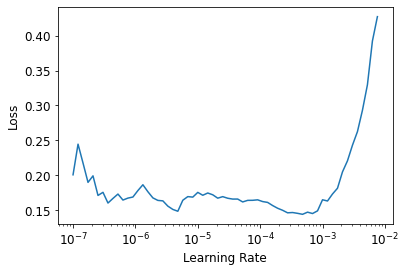

In [31]:
lr_min, lr_steep = learn.lr_find()

In [32]:
print(f"Minimum loss/10: {lr_min:.2e} Steepest point: {lr_steep:.2e}")

Minimum loss/10: 4.79e-05 Steepest point: 1.32e-06


In [33]:
learn.fit_one_cycle(6, lr_max = lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.141501,0.271389,0.941964,00:32
1,0.151843,0.231623,0.937500,00:31
2,0.117907,0.198447,0.964286,00:31
3,0.106267,0.215864,0.955357,00:31
4,0.089150,0.192717,0.959821,00:31
5,0.080011,0.176353,0.964286,00:32


In [34]:
learn.save("resnet34_stage2")

Path('data/train_sample/models/resnet34_stage2.pth')

In [35]:
learn.load("resnet34_stage2")

# Data Augmentation

In [131]:
dls = get_dls(64, 448, 448 * 2/3, "data/train_sample")

In [132]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

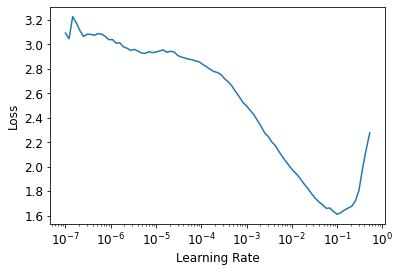

In [133]:
lr_min,lr_steep = learn.lr_find()

In [134]:
print(f"Minimum loss/10 {lr_min:.2e}, Steepest point {lr_steep:.2e}")

Minimum loss/10 1.00e-02, Steepest point 2.09e-03


In [135]:
learn.fit_one_cycle(8, lr_max = lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,2.208533,1.030473,0.687500,00:24
1,1.389071,0.673689,0.839286,00:24
2,0.982315,0.517585,0.906250,00:23
3,0.729421,0.316577,0.937500,00:23
4,0.567915,0.266345,0.937500,00:23
5,0.454939,0.263926,0.937500,00:23
6,0.374653,0.241752,0.941964,00:23
7,0.307644,0.234235,0.946429,00:24


In [137]:
learn.save("resnet34_stage1_aug23")

Path('data/train_sample/models/resnet34_stage1_aug23.pth')

In [145]:
learn.load("resnet34_stage1_aug23")

In [146]:
learn.unfreeze()

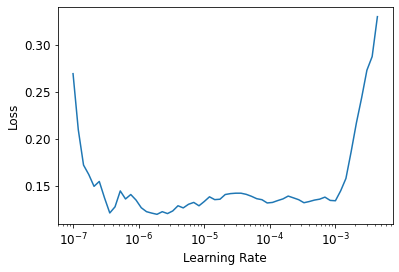

In [141]:
lr_min, lr_steep = learn.lr_find()

In [142]:
print(f"Minimum loss/10: {lr_min:.2e} Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.91e-07 Steepest point: 9.12e-07


In [147]:
learn.fit_one_cycle(9, lr_max = 1e-6)

KeyboardInterrupt: 

In [ ]:
learn.save("resnet34_stage2_aug")

In [ ]:
learn.load("resnet34_stage2_aug")

# Progessive resizing

## Size 1

In [183]:
dls = get_dls(128, 224, 112, "data/train_sample")

In [184]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

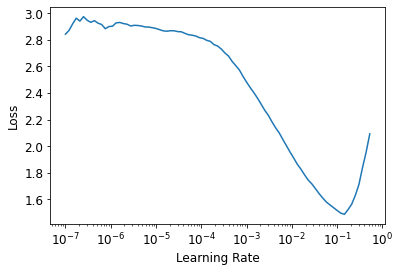

In [161]:
lr_min, lr_steep = learn.lr_find()

In [162]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.45e-02, Steepest point: 5.25e-03


In [163]:
learn.fit_one_cycle(5, lr_max = lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,2.077208,2.296493,0.611607,00:14
1,1.298025,0.999840,0.875000,00:14
2,0.969110,0.594701,0.866071,00:14
3,0.782257,0.347588,0.928571,00:14
4,0.647039,0.314905,0.924107,00:14


In [164]:
learn.save("resnet34_stage1_pr1")

Path('data/train_sample/models/resnet34_stage1_pr1.pth')

In [165]:
learn.load("resnet34_stage1_pr1")

In [166]:
learn.unfreeze()

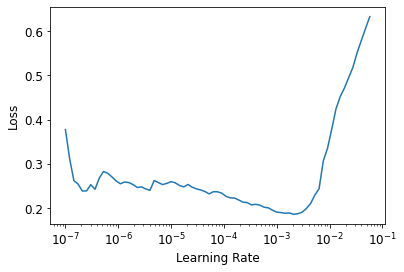

In [167]:
lr_min, lr_steep = learn.lr_find()

In [168]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 2.09e-04, Steepest point: 7.59e-07


In [169]:
learn.fit_one_cycle(6, lr_max = lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.240983,0.448082,0.915179,00:15
1,0.220918,0.240789,0.950893,00:15
2,0.187366,0.969690,0.879464,00:15
3,0.160855,0.398160,0.964286,00:15
4,0.141610,0.335061,0.964286,00:15
5,0.126999,0.331798,0.964286,00:15


In [170]:
learn.save("resnet34_stage2_pr1")

Path('data/train_sample/models/resnet34_stage2_pr1.pth')

In [185]:
learn.load("resnet34_stage2_pr1")

## Size 2

In [186]:
learn.freeze()

In [187]:
learn.dls = get_dls(64, 448, 224, "data/train_sample")

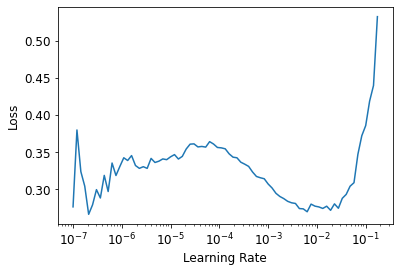

In [188]:
lr_min, lr_steep = learn.lr_find()

In [189]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 6.31e-04, Steepest point: 6.31e-07


In [190]:
learn.fit_one_cycle(5, lr_max = lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.328299,0.772560,0.794643,00:24
1,0.254268,0.376663,0.919643,00:25
2,0.208250,0.328940,0.933036,00:24
3,0.182390,0.314674,0.937500,00:23
4,0.166859,0.317960,0.937500,00:23


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f93b0604830>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f93b0604830>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join

In [191]:
learn.save("resnet34_stage1_pr2")

Path('data/train_sample/models/resnet34_stage1_pr2.pth')

In [192]:
learn.load("resnet34_stage1_pr2")

In [193]:
learn.unfreeze()

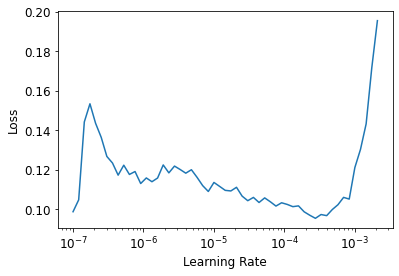

In [196]:
lr_min, lr_steep = learn.lr_find()

In [197]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 2.75e-05, Steepest point: 7.59e-07


In [198]:
learn.fit_one_cycle(6, lr_max = lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.109867,0.326971,0.937500,00:32
1,0.109523,0.316803,0.946429,00:32
2,0.087176,0.312366,0.946429,00:31
3,0.078956,0.256487,0.959821,00:32
4,0.068478,0.248270,0.964286,00:32
5,0.061350,0.248812,0.964286,00:32


In [199]:
learn.save("resnet34_stage2_pr2")

Path('data/train_sample/models/resnet34_stage2_pr2.pth')

In [200]:
learn.load("resnet34_stage2_pr2")

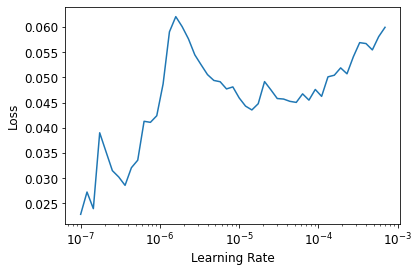

In [202]:
lr_min, lr_steep = learn.lr_find()

In [203]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 7.59e-08, Steepest point: 2.29e-06


In [204]:
learn.fit_one_cycle(6, lr_max = lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.048409,0.243989,0.968750,00:32
1,0.046503,0.242690,0.968750,00:32
2,0.054196,0.240366,0.968750,00:31
3,0.057331,0.252376,0.964286,00:32
4,0.051199,0.246369,0.968750,00:31
5,0.050533,0.246261,0.968750,00:32


# Test Time Augmentation (TTA)

In [8]:
?get_dls

In [10]:
dls = get_dls(64, 448, 224, "data/train_sample")

In [13]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

In [14]:
learn.load("resnet34_stage1_aug")

In [17]:
learn.tta?

In [18]:
learn.predict?

In [20]:
preds, targs = learn.get_preds()

In [21]:
accuracy(preds, targs).item()

0.9821428656578064

In [22]:
preds_tta, targs_tta = learn.tta()

In [23]:
accuracy(preds_tta, targs_tta)

tensor(0.9688)

# Mixup

In [25]:
dls = get_dls(64, 448, 224, "data/train_sample")

In [26]:
learn = cnn_learner(dls, resnet34, metrics = accuracy, cbs = MixUp)

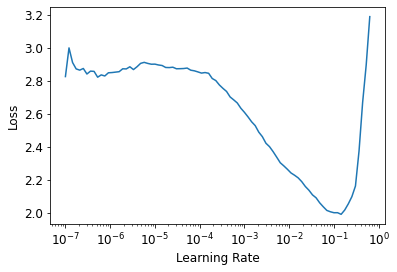

In [28]:
lr_min, lr_steep = learn.lr_find()

In [29]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.45e-02, Steepest point: 2.51e-03


In [30]:
learn.fit_one_cycle(5, lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,2.109927,1.031195,0.727679,00:23
1,1.615128,0.570309,0.843750,00:23
2,1.376151,0.328117,0.906250,00:23
3,1.224676,0.259837,0.946429,00:23
4,1.106244,0.247706,0.950893,00:23


In [33]:
learn.save("resnet34_stage1_aug_mixup")

Path('data/train_sample/models/resnet34_stage1_aug_mixup.pth')

In [ ]:
learn.load("resnet34_stage1_aug_mixup")

In [31]:
learn.unfreeze()

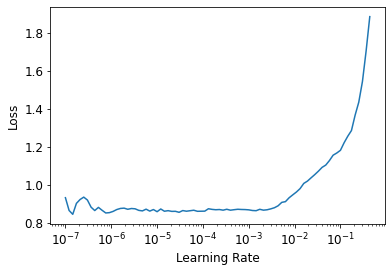

In [34]:
lr_min, lr_steep = learn.lr_find()

In [35]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 7.59e-08, Steepest point: 6.31e-07


In [41]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.819106,0.240948,0.950893,00:32
1,0.836005,0.219077,0.950893,00:31
2,0.816620,0.230620,0.933036,00:31
3,0.784395,0.205436,0.946429,00:32
4,0.753720,0.244562,0.928571,00:31
5,0.744766,0.206320,0.937500,00:31
6,0.736789,0.186289,0.950893,00:31
7,0.721872,0.197519,0.955357,00:31
8,0.704930,0.196183,0.955357,00:31
9,0.687897,0.190514,0.955357,00:31


In [42]:
learn.save("resnet34_stage2_aug_mixup")

Path('data/train_sample/models/resnet34_stage2_aug_mixup.pth')

In [43]:
learn.load("resnet34_stage2_aug_mixup")

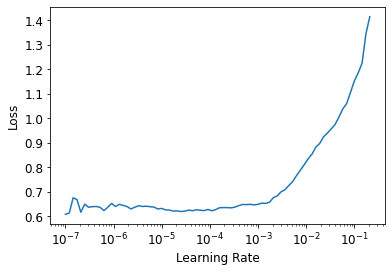

In [45]:
lr_min, lr_steep = learn.lr_find()

In [46]:
print(f"Minimum loss/10 {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10 2.51e-06, Steepest point: 9.12e-07


In [47]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.622621,0.189660,0.955357,00:31
1,0.639649,0.190097,0.955357,00:32
2,0.629157,0.183650,0.955357,00:31
3,0.628496,0.180195,0.955357,00:31
4,0.630867,0.179650,0.955357,00:31
5,0.645774,0.179884,0.955357,00:31
6,0.642291,0.176117,0.955357,00:31
7,0.643654,0.179569,0.950893,00:31
8,0.651629,0.183008,0.950893,00:31
9,0.636724,0.178997,0.950893,00:31


In [48]:
learn.fit_one_cycle(5, 1e-5 /2)

epoch,train_loss,valid_loss,accuracy,time
0,0.633049,0.175515,0.959821,00:31
1,0.613657,0.169943,0.964286,00:31
2,0.614088,0.177594,0.950893,00:31
3,0.608612,0.173540,0.950893,00:31
4,0.604763,0.176729,0.955357,00:31


In [49]:
learn.fit_one_cycle(5, 1e-5 /2)

epoch,train_loss,valid_loss,accuracy,time
0,0.596418,0.170257,0.950893,00:31
1,0.606662,0.169881,0.955357,00:31
2,0.591335,0.169450,0.950893,00:31
3,0.603464,0.169831,0.950893,00:31
4,0.612681,0.172400,0.955357,00:31


In [50]:
learn.fit_one_cycle(10, 1e-5 /2)

epoch,train_loss,valid_loss,accuracy,time
0,0.580645,0.162931,0.955357,00:31
1,0.598635,0.164423,0.964286,00:31
2,0.595915,0.171941,0.959821,00:31
3,0.620295,0.160635,0.955357,00:31
4,0.626192,0.166220,0.959821,00:31
5,0.644505,0.166747,0.959821,00:31
6,0.628278,0.165924,0.959821,00:31
7,0.619269,0.163819,0.959821,00:31
8,0.616246,0.158527,0.959821,00:31
9,0.612397,0.161400,0.959821,00:31


# Label Smoothing

In [51]:
dls = get_dls(64, 448, 224, "data/train_sample")

In [52]:
learn = cnn_learner(dls, resnet34, loss_func = LabelSmoothingCrossEntropy(), metrics=accuracy)

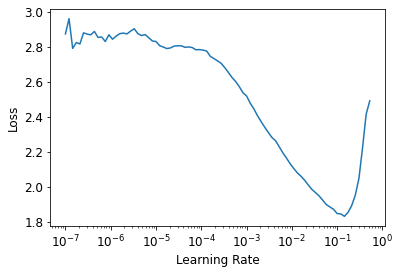

In [53]:
lr_min, lr_steep = learn.lr_find()

In [56]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.45e-02, Steepest point: 1.00e-03


In [57]:
learn.fit_one_cycle(5, lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,2.374869,1.250298,0.651786,00:23
1,1.767854,0.928908,0.839286,00:23
2,1.456933,0.804410,0.888393,00:23
3,1.263120,0.772798,0.901786,00:23
4,1.148091,0.757364,0.901786,00:23


In [58]:
learn.save("resnet34_stage1_aug_ls")

Path('data/train_sample/models/resnet34_stage1_aug_ls.pth')

In [59]:
learn.unfreeze()

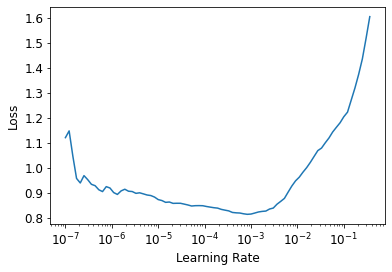

In [60]:
lr_min, lr_steep = learn.lr_find()

In [61]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 8.32e-05, Steepest point: 9.12e-07


In [62]:
learn.fit_one_cycle(30, lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.891653,0.795604,0.879464,00:31
1,0.862257,0.756226,0.888393,00:31
2,0.841349,0.709585,0.928571,00:31
3,0.815267,0.705856,0.915179,00:31
4,0.786609,0.695060,0.933036,00:31
5,0.760232,0.663071,0.946429,00:31
6,0.749272,0.665812,0.941964,00:31
7,0.725278,0.633924,0.964286,00:31
8,0.715579,0.627892,0.964286,00:31
9,0.702043,0.673213,0.950893,00:31


In [63]:
learn.save("resnet34_stage2_aug_ls")

Path('data/train_sample/models/resnet34_stage2_aug_ls.pth')

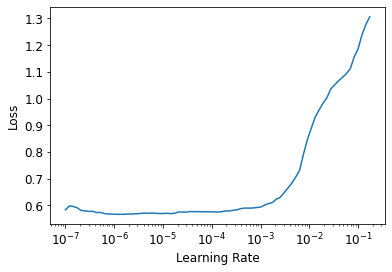

In [64]:
lr_min, lr_steep = learn.lr_find()

In [65]:
print(f"Minumum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minumum loss/10: 1.10e-07, Steepest point: 1.20e-05


In [66]:
learn.fit_one_cycle(20, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.589260,0.570110,0.973214,00:31
1,0.586315,0.566776,0.973214,00:32
2,0.579684,0.564623,0.973214,00:31
3,0.573125,0.562390,0.973214,00:31
4,0.572848,0.566634,0.973214,00:31
5,0.573282,0.569650,0.973214,00:31
6,0.576516,0.566770,0.973214,00:31
7,0.576157,0.563368,0.973214,00:31
8,0.573483,0.563039,0.973214,00:31
9,0.572180,0.556487,0.973214,00:31


# Results Analysis

- resnet34, initial
    - train loss: 0.080011	
    - valid loss: 0.176353	
    - accuracy: 0.96428
- resnet34, aug size/2, stage1
    - train loss: 0.223218	
    - valid loss: 0.153210	
    - accuracy: 0.982143
- resnet34, aug size * 2/3
    - train loss: 0.307644
    - valid loss: 0.234235
    - accuracy: 0.946429
- resnet34, aug size/2, pr 
    - train loss: 0.050533
    - valid loss: 0.246261
    - accuracy: 0.968750
- resnet34, aug size/2
    - train loss: 
    - valid loss: 
    - accuracy:  
- resnet34, aug size/2 mixup
    - train loss: 0.612397
    - valid loss: 0.161400	
    - accuracy: 0.95982 
- resnet34, aug size/2 ls
    - train loss: 
    - valid loss: 
    - accuracy:  
    
		

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

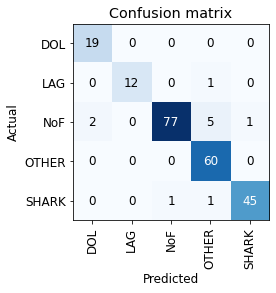

In [42]:
interp.plot_confusion_matrix()

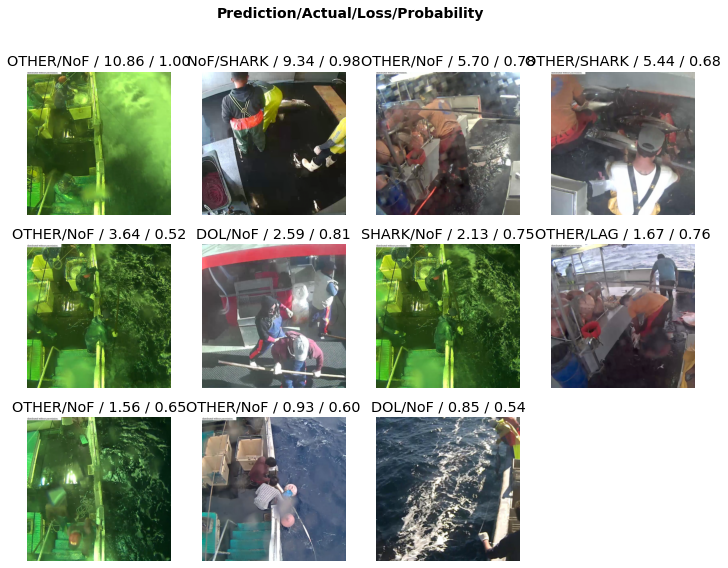

In [47]:
interp.plot_top_losses(11)

In [ ]:
interp.